### Radar Chart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('input/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tmp = pd.pivot_table(data, values='Fare', columns='Pclass')
tmp = tmp.rename(columns={1: '1st', 2: '2nd', 3: '3rd'})
tmp

Pclass,1st,2nd,3rd
Fare,84.154687,20.662183,13.67555


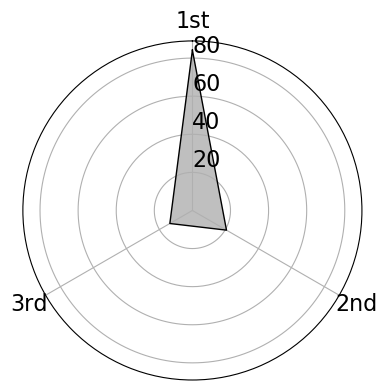

In [4]:
# Divide the plot / number of variables
categories = list(tmp[1:])
n_cats = len(categories)
angles = [n / float(n_cats) * 2 * np.pi for n in range(n_cats)]
angles += angles[:1]
 
fig = plt.figure(dpi=100)
ax = plt.subplot(111, polar=True)

# First axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Set one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Set yticks and labels
ax.set_rlabel_position(0)
plt.yticks([20, 40, 60, 80], ['20', '40', '60', '80'], color='black', size=12)
plt.ylim(0, 89)

# Draw plot
values = tmp.iloc[0].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color='black')
ax.fill(angles, values, 'grey', alpha=0.5)
ax.tick_params(direction='out', which='major', labelsize=16)
 
# Add legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
fig.tight_layout()
plt.show()